# Setup

Clone repo, install dependencies and check PyTorch and GPU.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive
#!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Setup complete. Using torch 1.9.0+cu102 (Tesla P100-PCIE-16GB)


In [ ]:
# Weights & Biases  (optional)
%pip install -q wandb
import wandb
wandb.login()

     |████████████████████████████████| 1.8MB 8.4MB/s 
     |████████████████████████████████| 102kB 14.4MB/s 
     |████████████████████████████████| 143kB 51.7MB/s 
     |████████████████████████████████| 174kB 51.4MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 


<IPython.core.display.Javascript object>

wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

# Train

Start training with our own dataset containing 17 classes initializing with pretrained weights provided with YOLOv5s

In [ ]:
# Train YOLOv5s on COCO128 for 3 epochs
!python train.py --img 640 --batch 16 --epochs 100 --data our_image_app.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=our_image_app.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=100, batch_size=16, img_size=[640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 2021-7-3 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, degrees=0.0, translate=0.1, scale=0.5, s

In [ ]:
!python train.py --img 640 --batch 16 --epochs 300 --data our_image_app.yaml --weights runs/train/exp/weights/last.pt

train: weights=runs/train/exp/weights/last.pt, cfg=, data=our_image_app.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=300, batch_size=16, img_size=[640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: ⚠️ WARNING: code is out of date by 7 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 2021-7-3 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=

In [ ]:
!python train.py --img 640 --batch 16 --epochs 300 --data our_image_app.yaml --weights runs/train/exp2/weights/last.pt --resume

train: weights=runs/train/exp2/weights/last.pt, cfg=, data=our_image_app.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=300, batch_size=16, img_size=[640], rect=False, resume=True, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds, for updates see https://github.com/ultralytics/yolov5
remote: Enumerating objects: 2, done.
remote: Counting objects: 100% (2/2), done.
remote: Total 2 (delta 1), reused 2 (delta 1), pack-reused 0
Unpacking objects: 100% (2/2), done.
From https://github.com/ultralytics/yolov5
   d88af3b..7888528  python_version_CI_tests -> origi

## Test

In [ ]:
!python test.py --weights runs/train/exp2/weights/best.pt --data our_image_app.yaml --img 640 --iou 0.65 --half

test: data=./data/our_image_app.yaml, weights=['runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=exp, exist_ok=False, half=True
YOLOv5 🚀 2021-7-3 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7097062 parameters, 0 gradients, 16.5 GFLOPs
val: Scanning 'datasets/labels/val' images and labels...880 found, 0 missing, 0 empty, 0 cor

## Visualize

Training results are automatically logged to [Tensorboard](https://www.tensorflow.org/tensorboard) and `runs/train/exp/results.txt`, which is plotted as `results.png` (below) after training completes. You can also plot any `results.txt` file manually:

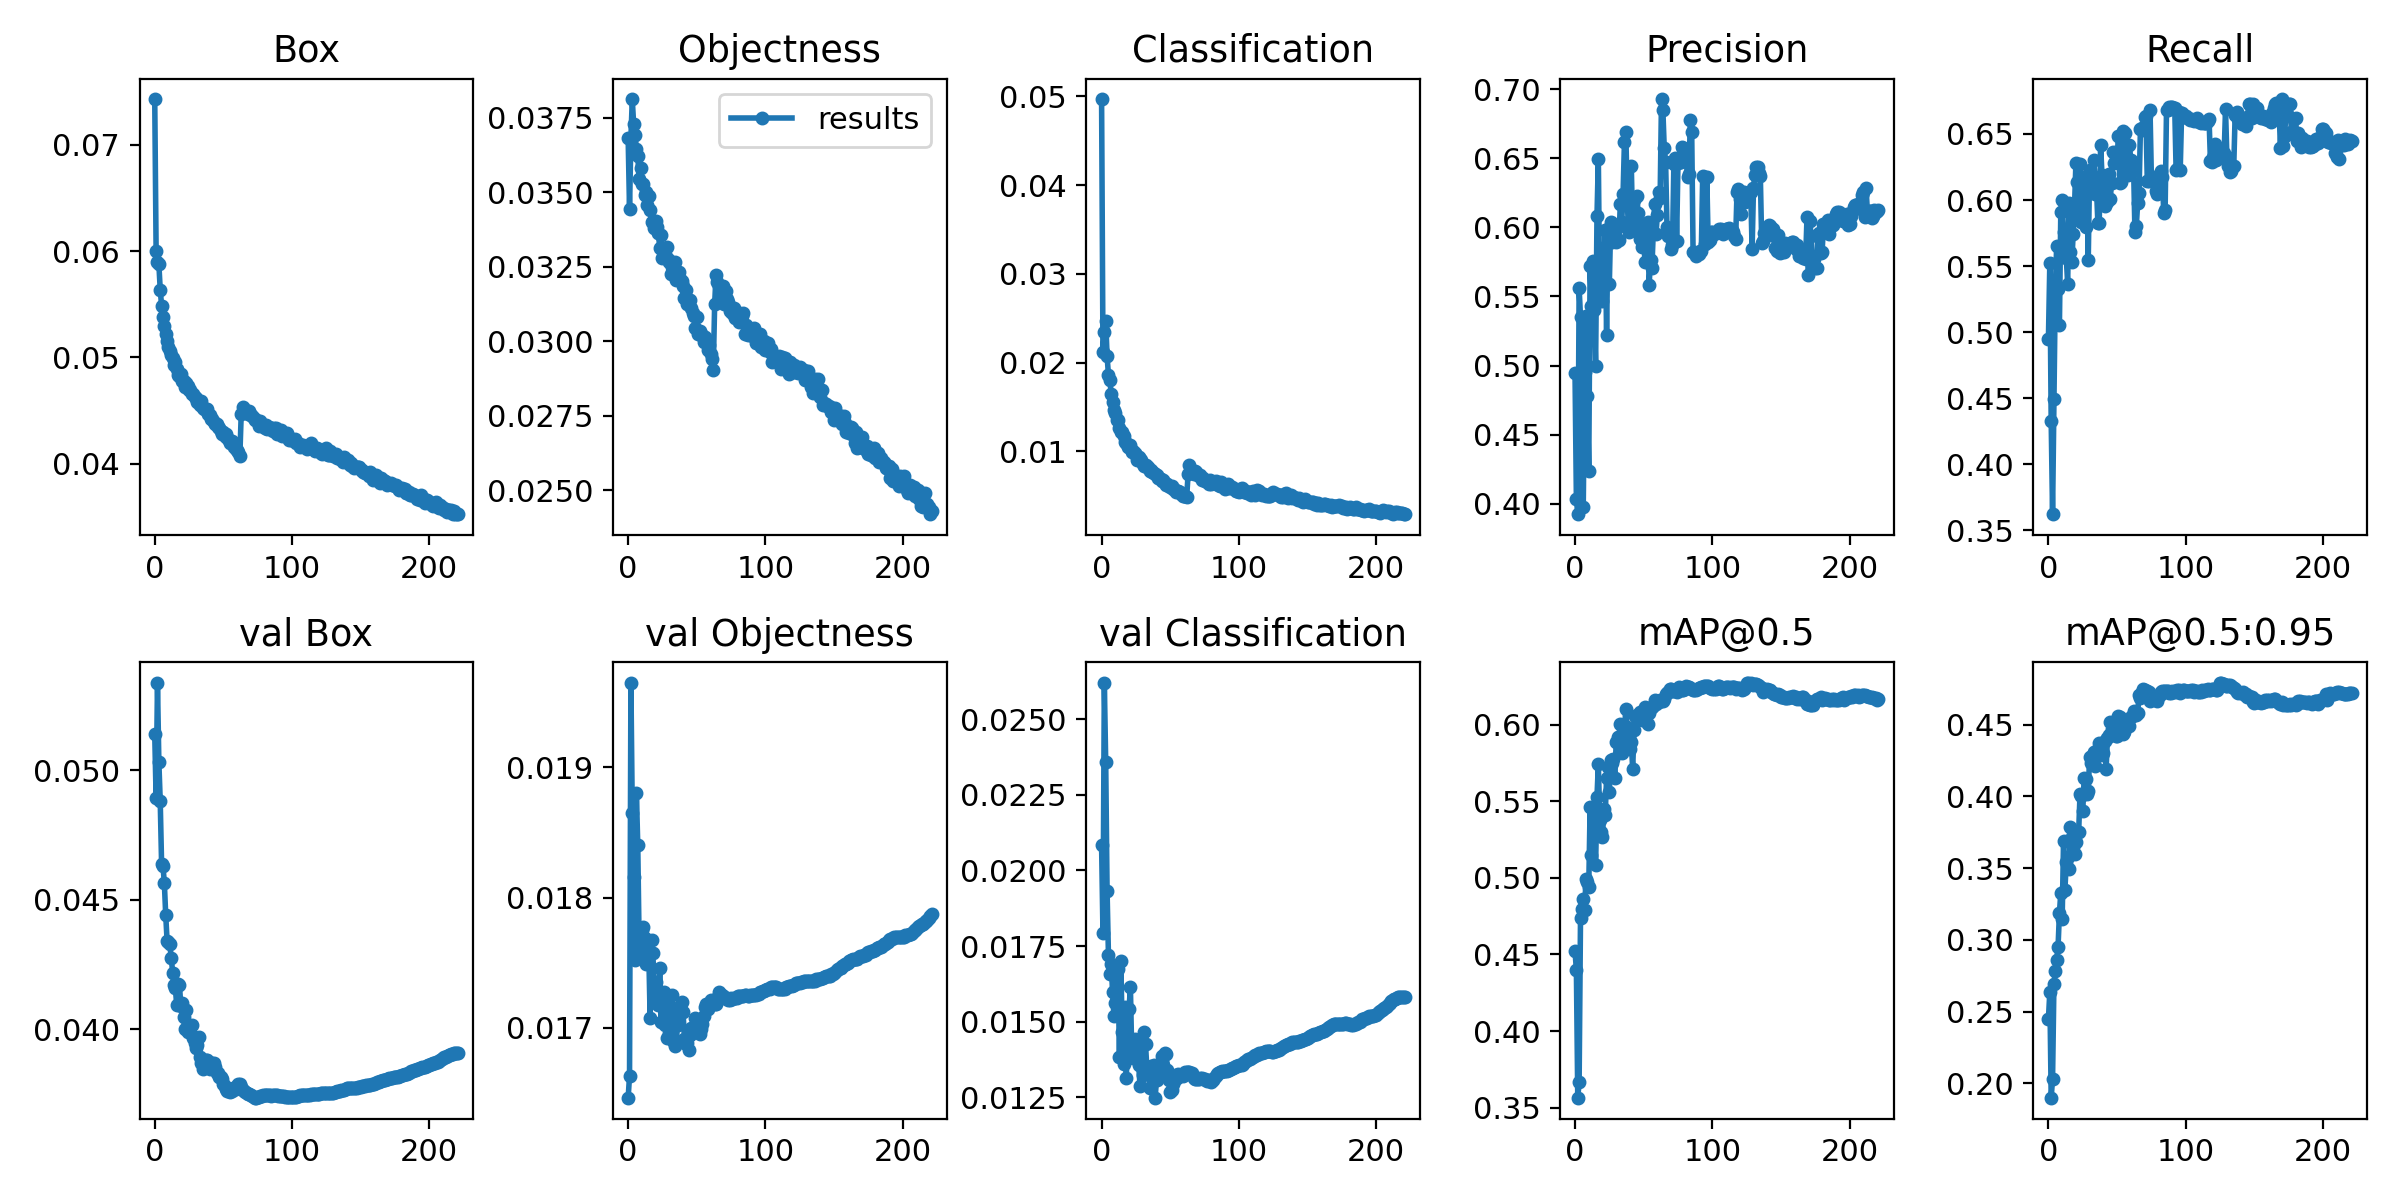

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp2')  # plot all results*.txt files in 'runs/train/exp'
Image(filename='runs/train/exp2/results.png', width=1600)

<p align="left"><img width="800" alt="COCO128 Training Results" src="https://github.com/ultralytics/yolov5/releases/download/v1.0/results_COCO128.png"></p>

# Train 2 


Start training with our own dataset containing 17 classes initializing with pretrained weights provided with YOLOv5s

In [ ]:
!python train.py --img 640 --batch 32 --epochs 300 --data our_image_app.yaml --weights yolov5s.pt

train: weights=yolov5s.pt, cfg=, data=our_image_app.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=300, batch_size=32, img_size=[640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: ⚠️ WARNING: code is out of date by 21 commits. Use 'git pull' to update or 'git clone https://github.com/ultralytics/yolov5' to download latest.
YOLOv5 🚀 2021-7-3 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, 

In [ ]:
!python train.py --img 640 --batch 32 --epochs 300 --data our_image_app.yaml --weights runs/train/exp3/weights/last.pt --resume

train: weights=runs/train/exp3/weights/last.pt, cfg=, data=our_image_app.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=300, batch_size=32, img_size=[640], rect=False, resume=True, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds, for updates see https://github.com/ultralytics/yolov5
Resuming training from ./runs/train/exp3/weights/last.pt
YOLOv5 🚀 2021-7-3 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.

In [ ]:
!python train.py --img 640 --batch 32 --epochs 300 --data our_image_app.yaml --weights runs/train/exp3/weights/last.pt --resume

train: weights=runs/train/exp3/weights/last.pt, cfg=, data=our_image_app.yaml, hyp=data/hyps/hyp.scratch.yaml, epochs=300, batch_size=32, img_size=[640], rect=False, resume=True, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket=, cache_images=False, image_weights=False, device=, multi_scale=False, single_cls=False, adam=False, sync_bn=False, workers=8, project=runs/train, entity=None, name=exp, exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias=latest, local_rank=-1
github: Command 'git fetch && git config --get remote.origin.url' timed out after 5 seconds, for updates see https://github.com/ultralytics/yolov5
Resuming training from ./runs/train/exp3/weights/last.pt
YOLOv5 🚀 2021-7-3 torch 1.9.0+cu102 CUDA:0 (Tesla P100-PCIE-16GB, 16280.875MB)

hyperparameters: lr0=0.01, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.

## Test
Test best results from training epoch 142

In [ ]:
!python test.py --weights runs/train/exp3/weights/best.pt --data our_image_app.yaml --img 640 --iou 0.65 --half

test: data=./data/our_image_app.yaml, weights=['runs/train/exp3/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/test, name=exp, exist_ok=False, half=True
YOLOv5 🚀 2021-7-3 torch 1.9.0+cu102 CUDA:0 (Tesla V100-SXM2-16GB, 16160.5MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Model Summary: 224 layers, 7097062 parameters, 0 gradients, 16.5 GFLOPs
val: Scanning 'datasets/labels/val.cache' images and labels... 880 found, 0 missing, 0 empty, 

## Visualize

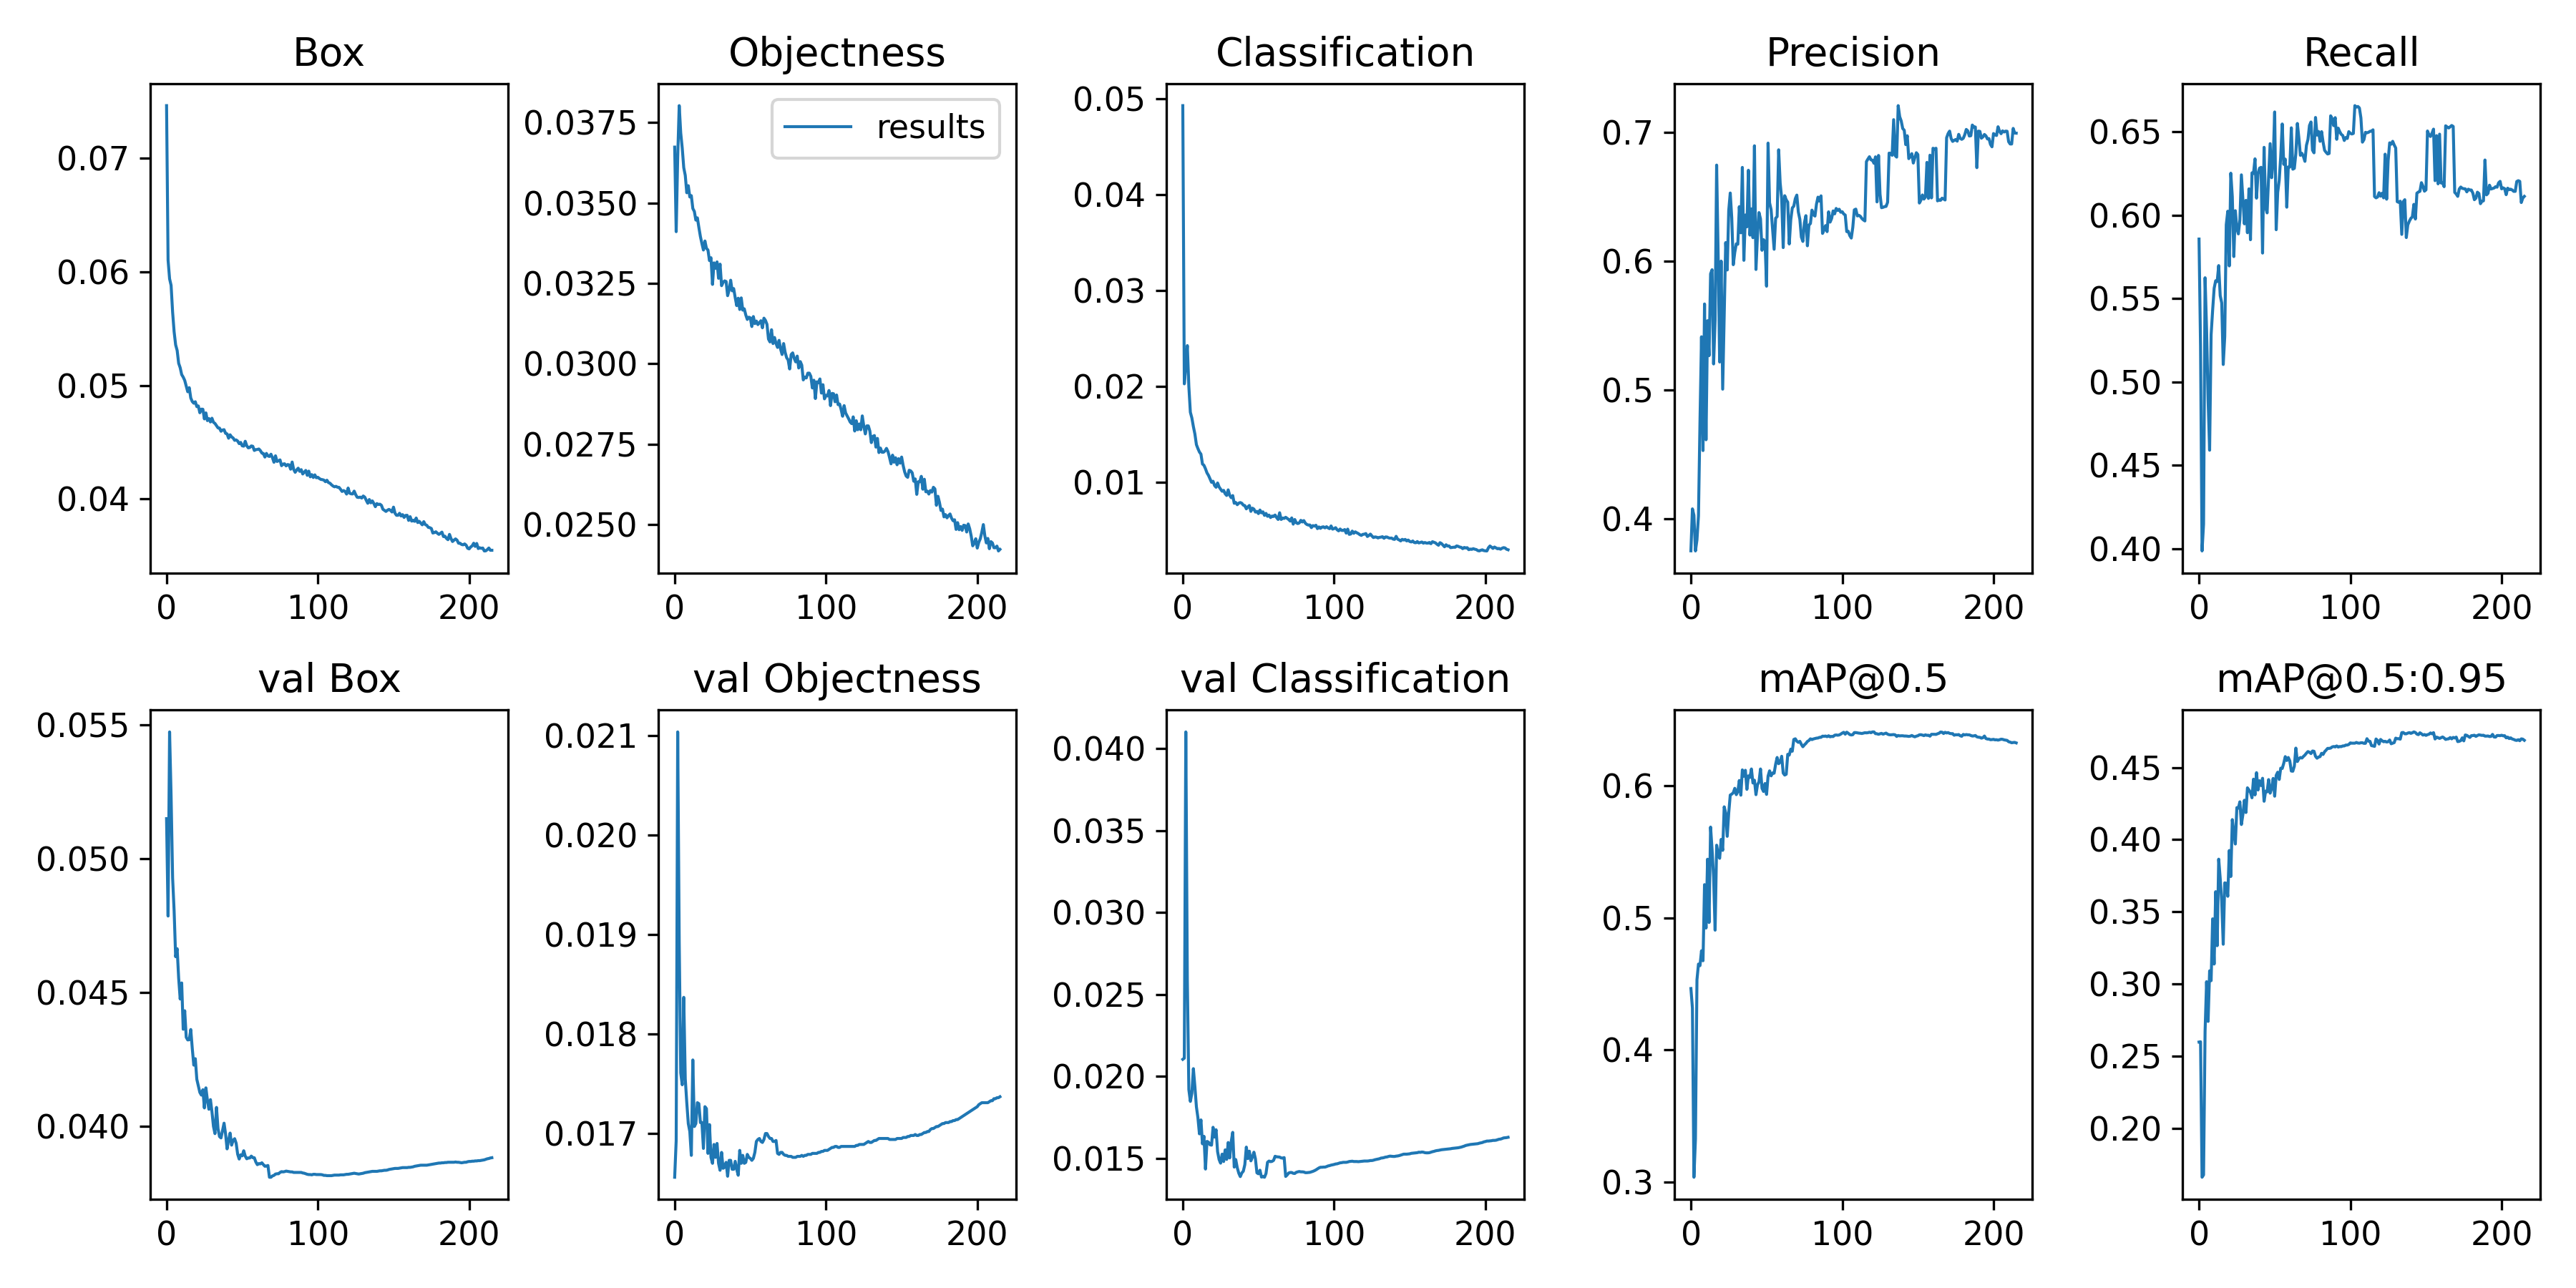

In [ ]:
from utils.plots import plot_results 
plot_results(save_dir='runs/train/exp3')  # plot all results*.txt files in 'runs/train/exp'
Image(filename='runs/train/exp3/results.png', width=1600)